SMS SPAM DETECTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("sms_spam.csv", encoding='ISO-8859-1')

In [45]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


CLEANING OF DATA

In [4]:
data_cleaned = data.dropna(axis=1)

In [5]:
data_cleaned.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data_cleaned['v1'] = data_cleaned['v1'].replace({'ham': 1, 'spam': 0})

C:\Users\samri\AppData\Local\Temp\ipykernel_1636\1599607215.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned['v1'] = data_cleaned['v1'].replace({'ham': 1, 'spam': 0})
C:\Users\samri\AppData\Local\Temp\ipykernel_1636\1599607215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['v1'] = data_cleaned['v1'].replace({'ham': 1, 'spam': 0})


In [7]:
data_cleaned.head()

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data_cleaned.shape

(5572, 2)

In [9]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [10]:
data_cleaned.isnull().sum()

v1    0
v2    0
dtype: int64

In [11]:
data_cleaned['v1'].value_counts()

v1
1    4825
0     747
Name: count, dtype: int64

PLOT TO CHECK COUNTS OF SPAM AND HAM

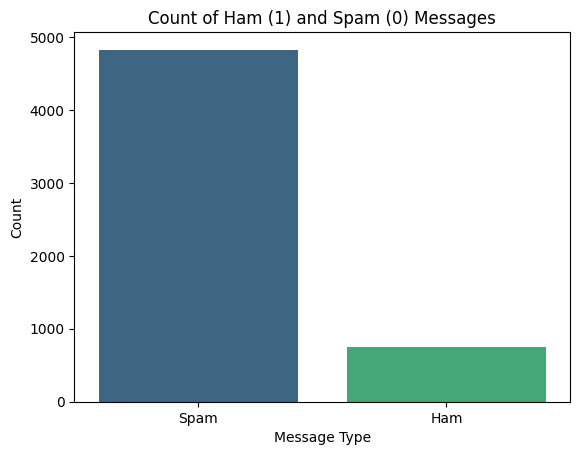

In [12]:
sns.countplot(x='v1', hue='v1', data=data, palette='viridis', legend=False)

plt.title('Count of Ham (1) and Spam (0) Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Spam', 'Ham'])

plt.show()

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

STEMMING AND VECTORIZATION OF DATA

In [16]:
port_stem=PorterStemmer()

In [17]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-z]',' ', content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)

  return stemmed_content

In [18]:
data_cleaned['stemmed_content']=data_cleaned['v2'].apply(stemming)

C:\Users\samri\AppData\Local\Temp\ipykernel_1636\1037510424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['stemmed_content']=data_cleaned['v2'].apply(stemming)


In [19]:
data_cleaned.head()

,v1,v2,stemmed_content
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [20]:
x=data_cleaned['stemmed_content'].values
y=data_cleaned['v1'].values

In [21]:
print(x)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat'
 'ok lar joke wif u oni'
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli'
 ... 'piti mood suggest'
 'guy bitch act like interest buy someth els next week gave us free'
 'rofl true name']


In [22]:
print(y)

[1 1 0 ... 1 1 1]


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(5572,) (4457,) (1115,)


In [25]:
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [26]:
print(x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 35883 stored elements and shape (4457, 5599)>
  Coords	Values
  (0, 3346)	0.3100859508607598
  (0, 5534)	0.32819844203613946
  (0, 1251)	0.49064914380654734
  (0, 1738)	0.5483388971294089
  (0, 5397)	0.5046982834334142
  (1, 2451)	0.5329895258174236
  (1, 4118)	0.31509422855823466
  (1, 1016)	0.3926827740463592
  (1, 3574)	0.3389887804120839
  (1, 3595)	0.3575202596811297
  (1, 2708)	0.2745649357070528
  (1, 2230)	0.37989208759582266
  (2, 3746)	0.48239709219397836
  (2, 1969)	0.4412366457605156
  (2, 4164)	0.35564004649030484
  (2, 2646)	0.38044497344956496
  (2, 4954)	0.4379249560865583
  (2, 2807)	0.33106914719847175
  (3, 153)	0.5304985785723425
  (3, 719)	0.6140741466429943
  (3, 4034)	0.5843664950674384
  (4, 1328)	1.0
  (5, 3297)	0.35569217668077585
  (5, 5547)	0.30298468979375937
  (5, 840)	0.36246914571406474
  :	:
  (4455, 2708)	0.1425442652201289
  (4455, 2042)	0.19554216144965345
  (4455, 3099)	0.2487166253127718

LOGISTIC REGRESSION

In [27]:
model=LogisticRegression(max_iter=1000)

In [28]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [29]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [30]:
print("accuracy score on the training data:",training_data_accuracy)
print("accuracy percentage on the training data:",training_data_accuracy*100)

accuracy score on the training data: 0.9721785954678035
accuracy percentage on the training data: 97.21785954678035


In [31]:
x_test_prediction=model.predict(x_test)
testing_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [32]:
print("accuracy score on the testing data:",testing_data_accuracy)
print("accuracy percentage on the testing data:",testing_data_accuracy*100)

accuracy score on the testing data: 0.9721973094170404
accuracy percentage on the testing data: 97.21973094170404


RANDOM FOREST REGRESSOR

In [33]:
rf_model = RandomForestClassifier(n_estimators=50,max_depth=20,min_samples_split=10,min_samples_leaf=5,n_jobs=-1,random_state=42)

In [34]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [35]:
x_train_prediction_rf=rf_model.predict(x_train)
training_data_accuracy_rf=accuracy_score(y_train,x_train_prediction_rf)

In [36]:
print("accuracy score on the training data:",training_data_accuracy_rf)
print("accuracy percentage on the training data:",training_data_accuracy_rf*100)

accuracy score on the training data: 0.9474983172537581
accuracy percentage on the training data: 94.74983172537581


In [37]:
x_test_prediction_rf=rf_model.predict(x_test)
testing_data_accuracy_rf=accuracy_score(y_test,x_test_prediction_rf)

In [38]:
print("accuracy score on the testing data:",testing_data_accuracy_rf)
print("accuracy percentage on the testing data:",testing_data_accuracy_rf*100)

accuracy score on the testing data: 0.9479820627802691
accuracy percentage on the testing data: 94.79820627802691


CLASSIFICATION REPORT FOR BOTH THE MODELS

In [39]:
from sklearn.metrics import  classification_report

class_report1=classification_report(y_test,x_test_prediction)
class_report2=classification_report(y_test,x_test_prediction_rf)

print(class_report1)
print("\n")
print(class_report2)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       149
           1       0.97      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



              precision    recall  f1-score   support

           0       1.00      0.61      0.76       149
           1       0.94      1.00      0.97       966

    accuracy                           0.95      1115
   macro avg       0.97      0.81      0.86      1115
weighted avg       0.95      0.95      0.94      1115



PLOT TO SHOW WHICH IS WORKING BETTER 

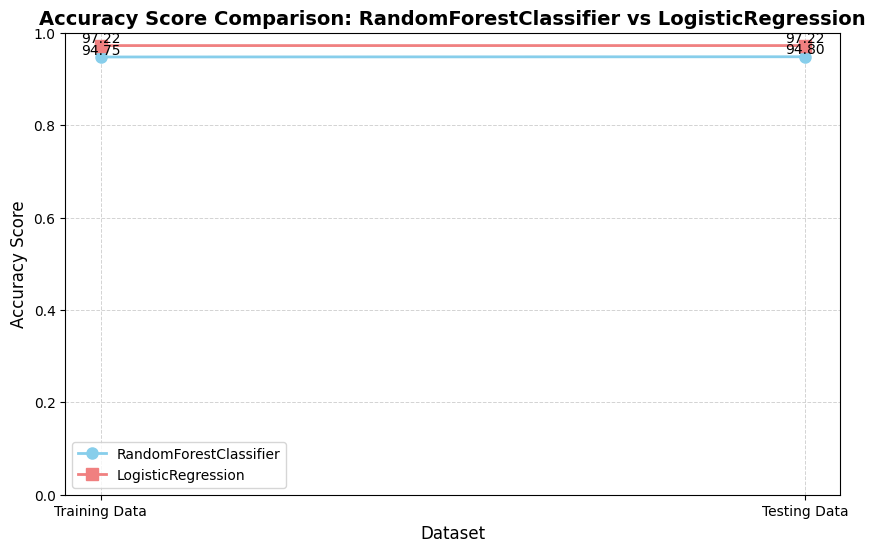

In [40]:
import matplotlib.pyplot as plt

rf_accuracy_scores = [training_data_accuracy_rf, testing_data_accuracy_rf]
lr_accuracy_scores = [training_data_accuracy, testing_data_accuracy]
labels = ['Training Data', 'Testing Data']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(labels, rf_accuracy_scores, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8, label='RandomForestClassifier')
for i in range(len(labels)):
    ax.text(i, rf_accuracy_scores[i], f'{rf_accuracy_scores[i]*100:.2f}', ha='center', va='bottom', color='black')

ax.plot(labels, lr_accuracy_scores, marker='s', color='lightcoral', linestyle='-', linewidth=2, markersize=8, label='LogisticRegression')
for i in range(len(labels)):
    ax.text(i, lr_accuracy_scores[i], f'{lr_accuracy_scores[i]*100:.2f}', ha='center', va='bottom', color='black')

ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_title('Accuracy Score Comparison: RandomForestClassifier vs LogisticRegression', fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', linewidth=0.7, color='lightgrey')
ax.set_ylim(0, 1)
ax.legend()

plt.show()

SVAING THE LOGISTOIC REGRESSION MODEL

In [41]:
import pickle

filename='trained_modle.sav'
pickle.dump(model,open(filename,'wb'))

vectorizer_filename = 'vectorizer.sav'
pickle.dump(vectorizer, open(vectorizer_filename, 'wb'))

LOADING THE MODEL AND TESTING IT

In [42]:
loaded_model=pickle.load(open('trained_modle.sav','rb'))

In [43]:
x_new=x_test[200]
print(y_test[200])

prediction=model.predict(x_new)
print(prediction)

if(prediction[0]==0):
  print("spam")
else:
  print("ham")

1
[1]
ham


SO THE PREDICTION IS ACCURATE BY USING LOGISTIC REGRESSION MODEL

THANK YOU....